In [119]:
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.lines as mlines
import numpy as np

# Class exercise 4 (Q1)

Consider the following optimization problem

\begin{equation*}
	\begin{aligned}
		& \underset{x_1,x_2}{\text{minimize}}
		& & f(x_1,x_2) = -x_1\\
		& \text{subject to}
		& & g_1(x_1,x_2) = x_2 - (1-x_1)^3 \le 0\\
		& & & g_2(x_1,x_2) = -x_2 \le 0\\
	\end{aligned}
\end{equation*}

We define the Lagrangian below:

In [120]:
import sympy as sym
from sympy import pprint, latex, root
from IPython.display import display, Latex

x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
m1 = sym.Symbol(r"\mu_1")
m2 = sym.Symbol(r"\mu_2")
f = -x1
g1 = x2 - (1-x1)**3
g2 = -x2
L = f + m1*g1 + m2*g2
display(Latex(r"$L=$"),L)

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)]])
display(Latex(r"$\nabla L=$"),dL)

kkt = (sym.diff(L,x1), sym.diff(L,x2), m1*g1, m2*g2)
sol = sym.solve(kkt,(x1,x2,m1,m2), dict=True)
display(sol)

<IPython.core.display.Latex object>

\mu_1*(x_2 - (1 - x_1)**3) - \mu_2*x_2 - x_1

<IPython.core.display.Latex object>

Matrix([
[3*\mu_1*(1 - x_1)**2 - 1],
[           \mu_1 - \mu_2]])

[]

We can see that the system of equations given by the KKT conditions does not yield any solutions. This because the solution to this problem is not a regular point. Check the rank of the Jacobian at $\mathbf{x}^* = (1,0)$.

In [121]:
dg = sym.Matrix([[sym.diff(g1,x1),sym.diff(g1,x2)],[sym.diff(g2,x1),sym.diff(g2,x2)]])
display(Latex(r"$\nabla \mathbf{g}=$"),dg)
display(Latex(r"$\nabla \mathbf{g}(1,0)=$"),dg.subs({x1:1,x2:0}))
display(Latex(r"$\mathrm{rank}(\nabla \mathbf{g}(1,0))=$"),dg.subs({x1:1,x2:0}).rank())

<IPython.core.display.Latex object>

Matrix([
[3*(1 - x_1)**2,  1],
[             0, -1]])

<IPython.core.display.Latex object>

Matrix([
[0,  1],
[0, -1]])

<IPython.core.display.Latex object>

1

We also plot the optimization problem below for visualization and we can see that the gradient $\nabla f(\mathbf{x})$ cannot be written as a linear combination of the gradients of the constraints $\nabla g_1(\mathbf{x})$ and $\nabla g_2(\mathbf{x})$ since they are linearly dependant (i.e., colinear).

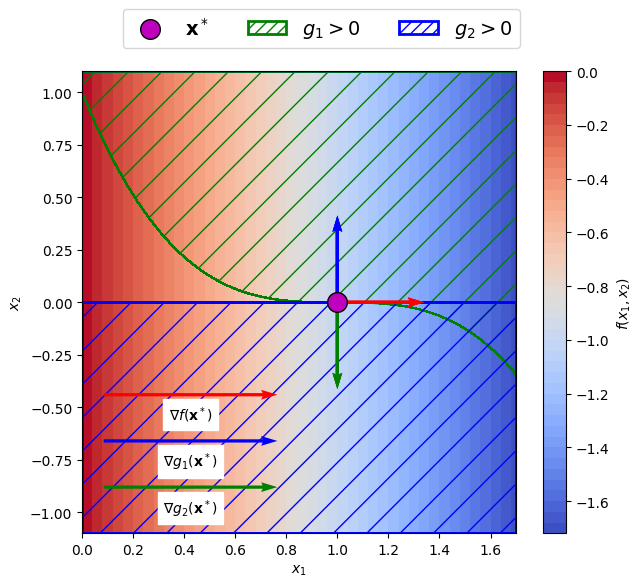

In [122]:
def constraint_color(cf,color):
    # https://github.com/matplotlib/matplotlib/issues/2789/#issuecomment-604599060
    for i, collection in enumerate(cf.collections):
        collection.set_edgecolor(color)

# optimizer
x_opt = [1., 0.]

# Objective
X1,X2 = np.meshgrid(np.linspace(0,1.7,40),np.linspace(-1.1,1.1,40))
F = -X1
handles = []; labels = []

origin = np.array([x_opt]*3).T # origin point
vectors = np.array([[1,0],[0,1],[0,-1]])

# initialize figure
fig, ax = plt.subplots(figsize=(7,6))
cf = ax.contourf(X1, X2, F,cmap="coolwarm",levels=50,zorder=-1)
opt = ax.scatter([x_opt[0],], [x_opt[1],], s = 200, marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",zorder=3)
Q = ax.quiver(*origin, vectors[0:1,0], vectors[0:1,1], color=['r',], scale=5, zorder=2)
qk = ax.quiverkey(Q, 0.25, 0.3, 2, r"$\nabla f(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')
Q = ax.quiver(*origin, vectors[1:2,0], vectors[1:2,1], color=['b'], scale=5, zorder=2)
qk=ax.quiverkey(Q, 0.25, 0.2, 2, r"$\nabla g_1(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')
Q = ax.quiver(*origin, vectors[2:3,0], vectors[2:3,1], color=['g'], scale=5, zorder=2)
qk=ax.quiverkey(Q, 0.25, 0.1, 2, r"$\nabla g_2(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
fig.colorbar(cf, ax=ax, orientation='vertical', label=r"$f(x_1,x_2)$")
handles += [opt]
labels += [r"$\mathbf{x}^*$"]

# Constraints
G1 = X2 - (1-X1)**3
cf = plt.contourf(X1, X2, G1, levels=[-200, 0, 200], colors='none',hatches=[None, '/'],extend='lower')
constraint_color(cf,'g')
a_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, edgecolor='g', facecolor='none', fill='None', hatch='///')
handles += [a_hatch]
labels += [r"$g_1>0$"]

G2 = -X2
cf = plt.contourf(X1, X2, G2, levels=[-200, 0, 200], colors='none',hatches=[None, '/'],extend='lower')
constraint_color(cf,'b')
a_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, edgecolor='b', facecolor='none', fill='None', hatch='///')
handles += [a_hatch]
labels += [r"$g_2>0$"]

lx = fig.legend(handles, labels, loc='upper center', ncol=3, fontsize = 14)
# fig.savefig("irregular_point.pdf",bbox_inches="tight")

plt.show()

# Class exercise 3 (Q1)

Consider the following optimization problem

\begin{equation*}
	\begin{aligned}
		& \underset{x_1,x_2,x_3}{\text{minimize}}
		& & f(x_1,x_2,x_3) = -3x_1 + x_2 - x_3^2\\
		& \text{subject to}
		& & g(x_1,x_2,x_3) = x_1 + x_2 + x_3 \le 0\\
		& & & h(x_1,x_2,x_3) = -x_1 + 2x_2 + x_3^2 = 0\\
	\end{aligned}
\end{equation*}

We define the Lagrangian below:

In [123]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")
m = sym.Symbol(r"\mu")
l = sym.Symbol(r"\lambda")
f = -3*x1 + x2 - x3**2
g = x1 + x2 + x3
h = -x1 + 2*x2 + x3**2
L = f + m*g + l*h
display(Latex(r"$L=$"),L)
# print(latex(L))

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))

dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)
# print(latex(dL2))

kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), m*g, l*h)
sol = sym.solve(kkt,(x1,x2,x3,m,l))
display(Latex("$"+latex(sol[0])+"$"))

<IPython.core.display.Latex object>

\lambda*(-x_1 + 2*x_2 + x_3**2) + \mu*(x_1 + x_2 + x_3) - 3*x_1 + x_2 - x_3**2

<IPython.core.display.Latex object>

Matrix([
[         -\lambda + \mu - 3],
[        2*\lambda + \mu + 1],
[2*\lambda*x_3 + \mu - 2*x_3]])

<IPython.core.display.Latex object>

Matrix([
[0, 0,             0],
[0, 0,             0],
[0, 0, 2*\lambda - 2]])

<IPython.core.display.Latex object>

We can see that the solution is $\mathbf{x}^* = \left(-\dfrac{115}{588},-\dfrac{95}{588},\dfrac{5}{14}\right)$ with $\mu = \dfrac{5}{3}$, $\lambda=-\dfrac{4}{3}$. Substituting these values in $\nabla^2 L$ results in a negative definite matrix. This means that $\mathbf{x}^*$ is a local maximizer.

# Class exercise 4 (Q3)

## Part(a) solving the problem using the method of constrained gradients

Consider this problem

\begin{equation*}
	\begin{aligned}
		& \underset{x_1,x_2,x_3}{\text{minimize}}
		& & f(x) = x_1^2 + x_2^2 + x_3^2\\
		& \text{subject to}
		& & g_1(x) = \dfrac{x_1^2}{4} + \dfrac{x_2^2}{5} + \dfrac{x_3^2}{25} - 1 = 0\\
		& & & g_2(x) = x_1 + x_2 - x_3 = 0\\
	\end{aligned}
\end{equation*}

We use the method of reduced gradients to compute $\nabla w^\mathrm{T}$ and set it to 0 to obtain one equation. The other two equations are $h_1(x) = 0$ and $h_2(x)=0$:

\begin{align*}
21x_1x_3 - 16x_2x_3 -15x_1x_2 = 0\\
\dfrac{x_1^2}{4} + \dfrac{x_2^2}{5} + \dfrac{x_3^2}{25} - 1 = 0\\
 x_1 + x_2 - x_3 = 0
\end{align*}

We solve this system of nonlinear equations using ``sympy``


In [124]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")

f = x1**2 + x2**2 + x3**2
df = sym.Matrix([[sym.diff(f,x1)],[sym.diff(f,x2)],[sym.diff(f,x3)]])

h = sym.Matrix([[(x1**2)/4 + (x2**2)/5 + (x3**2)/25 - 1],[x1 + x2 - x3]])
dh = sym.Matrix([
    [sym.diff(h[0],x1),sym.diff(h[0],x2),sym.diff(h[0],x3)],
    [sym.diff(h[1],x1),sym.diff(h[1],x2),sym.diff(h[1],x3)]
])

dhs = dh[:,0:2]
dhd = dh[:,2:]
dfs = df[0:2,:]
dfd = df[2:,:]

dw = dfd - dfs.T*dhs**-1*dhd
# print(latex(sym.simplify(dw)))
display(Latex(r"$\nabla w^\text{T}=$"),Latex("$"+latex(sym.simplify(dw))+"$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [125]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")

eq1 = dw[0]
eq2 = (x1**2)/4 + (x2**2)/5 + (x3**2)/25 - 1
eq3 = x1 + x2 - x3

sol = sym.solve([eq1,eq2,eq3],(x1,x2,x3))
for i,s in enumerate(sol):
    print("===================================")
    print("Solution %i:"%(i+1))
    display(Latex("$"+latex(s)+"$"))
    x_sol = [i.evalf() for i in s]
    print("x_sol =",x_sol)
    f_sol = f.subs({x1:x_sol[0], x2:x_sol[1], x3:x_sol[2]})
    print("f =", f_sol)

Solution 1:


<IPython.core.display.Latex object>

x_sol = [-1.57377895072927, 1.37705658188811, -0.196722368841158]
f = 4.41176470588235
Solution 2:


<IPython.core.display.Latex object>

x_sol = [1.57377895072927, -1.37705658188811, 0.196722368841158]
f = 4.41176470588235
Solution 3:


<IPython.core.display.Latex object>

x_sol = [-1.02597835208515, -1.53896752812773, -2.56494588021289]
f = 10.0000000000000
Solution 4:


<IPython.core.display.Latex object>

x_sol = [1.02597835208515, 1.53896752812773, 2.56494588021289]
f = 10.0000000000000


We need to examine $\nabla^2 w$ to verify the nature of the stationary points. This calculation is tedious and can be seen in Section 5.4 of Papalambros and Wilde 

## Part(b) solving the problem using KKT conditions

We define the Lagrangian below:

In [126]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")
l1 = sym.Symbol(r"\lambda_1")
l2 = sym.Symbol(r"\lambda_2")

f = x1**2 + x2**2 + x3**2
h1 = (x1**2)/4 + (x2**2)/5 + (x3**2)/25 - 1
h2 = x1 + x2 - x3

L = f + l1*h1 + l2*h2
display(Latex(r"$L=$"),L)
# print(latex(L))

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))

dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)
# print(latex(dL2))

kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), l1*h1, l2*h2)
sol = sym.solve(kkt,(x1,x2,x3,l1,l2))
for i,s in enumerate(sol):
    print("===================================")
    print("Solution %i:"%(i+1))
    display(Latex("$"+latex(s)+"$"))
    x_sol = [i.evalf() for i in s]
    print("x_sol =",x_sol)
    f_sol = f.subs({x1:x_sol[0], x2:x_sol[1], x3:x_sol[2]})
    print("f =", f_sol)

<IPython.core.display.Latex object>

\lambda_1*(x_1**2/4 + x_2**2/5 + x_3**2/25 - 1) + \lambda_2*(x_1 + x_2 - x_3) + x_1**2 + x_2**2 + x_3**2

<IPython.core.display.Latex object>

Matrix([
[   \lambda_1*x_1/2 + \lambda_2 + 2*x_1],
[ 2*\lambda_1*x_2/5 + \lambda_2 + 2*x_2],
[2*\lambda_1*x_3/25 - \lambda_2 + 2*x_3]])

<IPython.core.display.Latex object>

Matrix([
[\lambda_1/2 + 2,                 0,                  0],
[              0, 2*\lambda_1/5 + 2,                  0],
[              0,                 0, 2*\lambda_1/25 + 2]])

Solution 1:


<IPython.core.display.Latex object>

x_sol = [-2.00000000000000, 0, 0, -4.00000000000000, 0]
f = 4.00000000000000
Solution 2:


<IPython.core.display.Latex object>

x_sol = [0, 0, -5.00000000000000, -25.0000000000000, 0]
f = 25.0000000000000
Solution 3:


<IPython.core.display.Latex object>

x_sol = [0, 0, 0, 0, 0]
f = 0
Solution 4:


<IPython.core.display.Latex object>

x_sol = [0, 0, 5.00000000000000, -25.0000000000000, 0]
f = 25.0000000000000
Solution 5:


<IPython.core.display.Latex object>

x_sol = [0, -2.23606797749979, 0, -5.00000000000000, 0]
f = 5.00000000000000
Solution 6:


<IPython.core.display.Latex object>

x_sol = [0, 2.23606797749979, 0, -5.00000000000000, 0]
f = 5.00000000000000
Solution 7:


<IPython.core.display.Latex object>

x_sol = [2.00000000000000, 0, 0, -4.00000000000000, 0]
f = 4.00000000000000
Solution 8:


<IPython.core.display.Latex object>

x_sol = [-1.57377895072927, 1.37705658188811, -0.196722368841158, -4.41176470588235, -0.324013313385437]
f = 4.41176470588235
Solution 9:


<IPython.core.display.Latex object>

x_sol = [1.57377895072927, -1.37705658188811, 0.196722368841158, -4.41176470588235, 0.324013313385437]
f = 4.41176470588235
Solution 10:


<IPython.core.display.Latex object>

x_sol = [-1.02597835208515, -1.53896752812773, -2.56494588021289, -10.0000000000000, -3.07793505625546]
f = 10.0000000000000
Solution 11:


<IPython.core.display.Latex object>

x_sol = [1.02597835208515, 1.53896752812773, 2.56494588021289, -10.0000000000000, 3.07793505625546]
f = 10.0000000000000


The first 7 solutions do not satisfy the KKT conditions!. 
Only the last 4 are valid and are considered KKT points. We can easily examine the Hessian ($\nabla ^2 L$) to check the nature of the stationary points:

In [127]:
for i,s in enumerate(sol[7:]):
    print("===================================")
    print("Solution %i:"%(i+1))
    # display(Latex("$"+latex(s)+"$"))
    x_sol = [i.evalf() for i in s]
    x_str = ",".join(["{:.2f}".format(x) for x in x_sol])
    dL2_sol = dL2.subs({x1:x_sol[0], x2:x_sol[1], x3:x_sol[2], l1:x_sol[3], l2:x_sol[4]})
    display(Latex(r"$\nabla^2 L(%s)=$" %x_str),dL2_sol)


Solution 1:


<IPython.core.display.Latex object>

Matrix([
[-0.205882352941177,                 0,                0],
[                 0, 0.235294117647059,                0],
[                 0,                 0, 1.64705882352941]])

Solution 2:


<IPython.core.display.Latex object>

Matrix([
[-0.205882352941177,                 0,                0],
[                 0, 0.235294117647059,                0],
[                 0,                 0, 1.64705882352941]])

Solution 3:


<IPython.core.display.Latex object>

Matrix([
[-3.0,    0,   0],
[   0, -2.0,   0],
[   0,    0, 1.2]])

Solution 4:


<IPython.core.display.Latex object>

Matrix([
[-3.0,    0,   0],
[   0, -2.0,   0],
[   0,    0, 1.2]])

We can see that all four KKT points are inflection points because their associated Hessians are all indefinite!